## Data split distribution
Notebook that makes sure the data is split evenly and will export both train and split to a seperate csv, so that this doesnt have to be rerun and the versions can be imported into the data augmentation thing

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split

In [2]:
ziploc ="E:/School/UU/PATREC/CXR_project/"
imgLoc = "C:/Users/jensr/.darwin/datasets/v7-labs/covid-19-chest-x-ray-dataset/images/"
zf= zipfile.ZipFile(ziploc+'clean_data.zip') 
df = pd.read_csv(zf.open('clean_data.csv'))

In [3]:
random.seed(4)

In [28]:
len(df)

6504

In order to have an even split between train validation and test we first have to do some data analysis (80-10-10).
The main thing we will focus on is an equal distribution between all the types, after which we will look if we can combine it with the view as well, but this might be a limitation.

In [5]:
# Unique types
df.type.unique()

array(['Undefined Pneumonia', nan, 'Bacterial Pneumonia',
       'Fungal Pneumonia', 'Viral Pneumonia', 'No Pneumonia'],
      dtype=object)

In [6]:
test = df.type.value_counts(dropna=False)

In [7]:
test

Bacterial Pneumonia    2816
Viral Pneumonia        1970
No Pneumonia           1606
NaN                      78
Fungal Pneumonia         23
Undefined Pneumonia      11
Name: type, dtype: int64

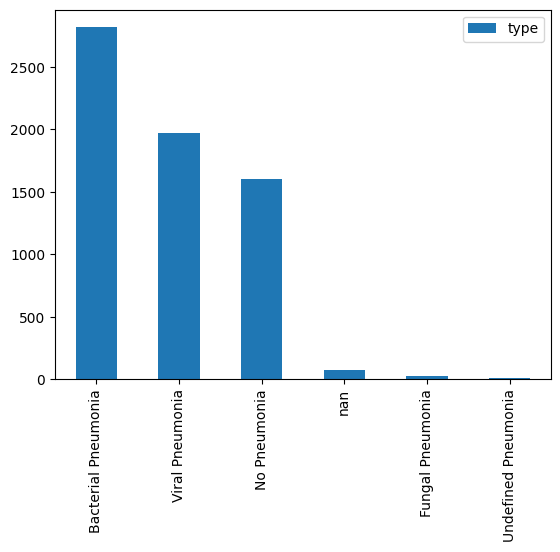

In [8]:
# sns.barplot(data=test, x=test.index, y=test.values)
test.plot.bar()
plt.legend()
plt.show()

In [9]:
# Unique views
df.view.unique()

array(['View/PA', 'View/AP_Supine', 'View/Lateral', 'View/AP',
       'View/Axial', nan, 'View/Coronal'], dtype=object)

In [10]:
test2 = df.view.value_counts(dropna=False)
test2

NaN               5858
View/PA            297
View/AP_Supine     134
View/AP            106
View/Axial          47
View/Lateral        46
View/Coronal        16
Name: view, dtype: int64

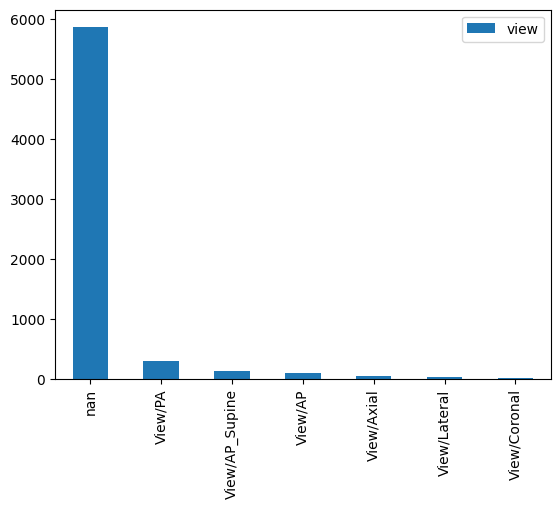

In [11]:
test2.plot.bar()
plt.legend()
plt.show()

As you can see only the covid labeled data has the view orientation applied. This means it will be hard to see if the non covid data has a similar distribution for the views, therefore we will focus on the even split for the different types. With the nan type removed

### splitting done after this point

In [67]:
# split covid and normal viral and make dataframes for each type
covid_df = df[df["Covid"] == True]
viral_df_with_cov = df[df['type'] == "Viral Pneumonia"]
viral_df = viral_df_with_cov[viral_df_with_cov["Covid"] == False]
bacterial_df = df[df['type'] == "Bacterial Pneumonia"]
no_pneumonia_df = df[df['type'] == "No Pneumonia"]
fungal_df = df[df['type'] == "Fungal Pneumonia"]
undefined_df = df[df['type'] == "Undefined Pneumonia"]

In [68]:
# Valuecounts per type og df
test

<AxesSubplot:title={'center':'distribution of type between train val test'}>

In [69]:
# See if splitting went okay by checking it to the value counts from the og df
print("Bacterial Pneumonia \t \t",len(bacterial_df))
print("Viral Pneumonia with covid \t",len(viral_df_with_cov))
print("No Pneumonia \t \t \t",len(no_pneumonia_df))
print("Fungal Pneumonia \t \t",len(fungal_df))
print("Undefined Pneumonia \t \t",len(undefined_df))
print("Viral Pneumonia without covid \t",len(viral_df))
print("Covid \t \t \t \t",len(covid_df))

Bacterial Pneumonia 	 	 2816
Viral Pneumonia with covid 	 1970
No Pneumonia 	 	 	 1606
Fungal Pneumonia 	 	 23
Undefined Pneumonia 	 	 11
Viral Pneumonia without covid 	 1449
Covid 	 	 	 	 521


In [70]:
# Random seed is defined above after the imports.
# we will now split every df in train and val test
# split train and remains 80:20 thenremains 50:50 for 80:10:10

# bacterial pneumonia
bac_train, bac_rem = train_test_split(bacterial_df, test_size=0.2,  random_state=42)
bac_val, bac_test = train_test_split(bac_rem, test_size=0.5,  random_state=42)

# No pneumonia
no_train, no_rem = train_test_split(no_pneumonia_df, test_size=0.2,  random_state=42)
no_val, no_test = train_test_split(no_rem, test_size=0.5,  random_state=42)

# fungal pneumonia
fung_train, fung_rem = train_test_split(fungal_df, test_size=0.2,  random_state=42)
fung_val, fung_test = train_test_split(fung_rem, test_size=0.5,  random_state=42)

# undefined pneumonia
un_train, un_rem = train_test_split(undefined_df, test_size=0.2,  random_state=42)
un_val, un_test = train_test_split(un_rem, test_size=0.5,  random_state=42)

# Viral pneumonia
viral_train, viral_rem = train_test_split(viral_df, test_size=0.2,  random_state=42)
viral_val, viral_test = train_test_split(viral_rem, test_size=0.5,  random_state=42)

# Viral pneumonia
cov_train, cov_rem = train_test_split(covid_df, test_size=0.2,  random_state=42)
cov_val, cov_test = train_test_split(cov_rem, test_size=0.5,  random_state=42)

### Make Train val test
and export them to csv so its easier to load in for the network

In [102]:
# Make train val test dfs
train_frames = [bac_train, no_train, fung_train, un_train, viral_train, cov_train]
val_frames = [bac_val, no_val, fung_val, un_val, viral_val, cov_val]
test_frames = [bac_test, no_test, fung_test, un_test, viral_test, cov_test]

train = pd.concat(train_frames)
val =  pd.concat(val_frames)
test =  pd.concat(test_frames)

In [108]:
# Export to CSV files in zip
tcompression_opts = dict(method='zip',archive_name='train_data.csv')
vcompression_opts = dict(method='zip',archive_name='val_data.csv')  
tecompression_opts = dict(method='zip',archive_name='val_data.csv')  
train.to_csv('E:/School/UU/PATREC/CXR_project/train_data.csv.zip', index=False,compression=tcompression_opts)
val.to_csv('E:/School/UU/PATREC/CXR_project/val_data.csv.zip', index=False,compression=vcompression_opts)
test.to_csv('E:/School/UU/PATREC/CXR_project/test_data.csv.zip', index=False,compression=tecompression_opts)

# train.to_csv('train_data.csv')
# val.to_csv('val_data.csv')
# test.to_csv('test_data.csv')

## Distribution check for both type and view
Note we didnt look at evenly distributing view but always good to check if this is the case

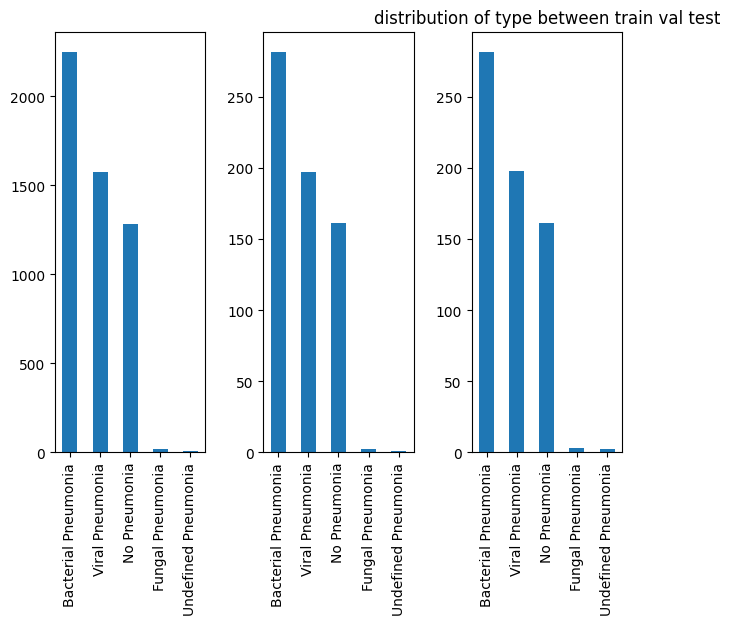

In [104]:
# distribution between types went okay and remained the same
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(h_pad=2)
plt.title("distribution of type between train val test")

train.type.value_counts(dropna=False).plot.bar(ax=axes[0])
val.type.value_counts(dropna=False).plot.bar(ax=axes[1])
test.type.value_counts(dropna=False).plot.bar(ax=axes[2])

plt.show()

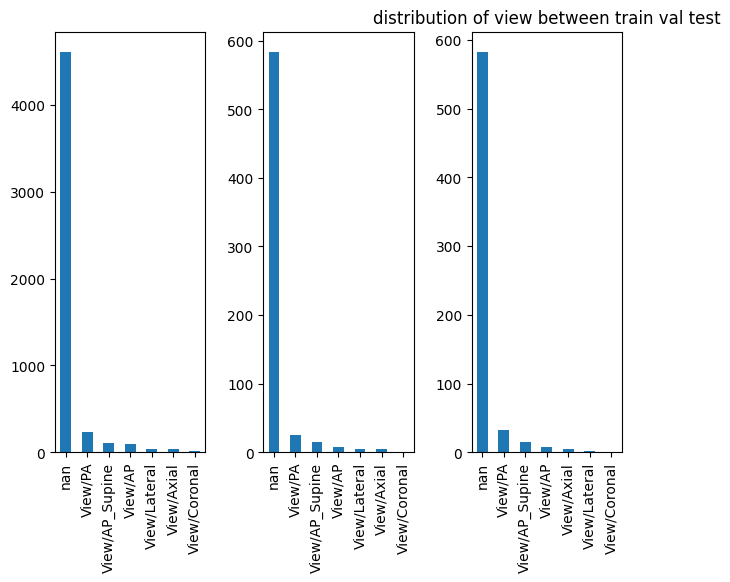

In [105]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(h_pad=2)
plt.title("distribution of view between train val test")

train.view.value_counts(dropna=False).plot.bar(ax=axes[0])
val.view.value_counts(dropna=False).plot.bar(ax=axes[1])
test.view.value_counts(dropna=False).plot.bar(ax=axes[2])
# df.view.value_counts(dropna=False).plot.bar(ax=axes[3])

plt.show()

This also appears to be roughly the same but is it also evenly distributed among the other categories, msot likely not since this is presumably only labeled for the covid data, but good to verify

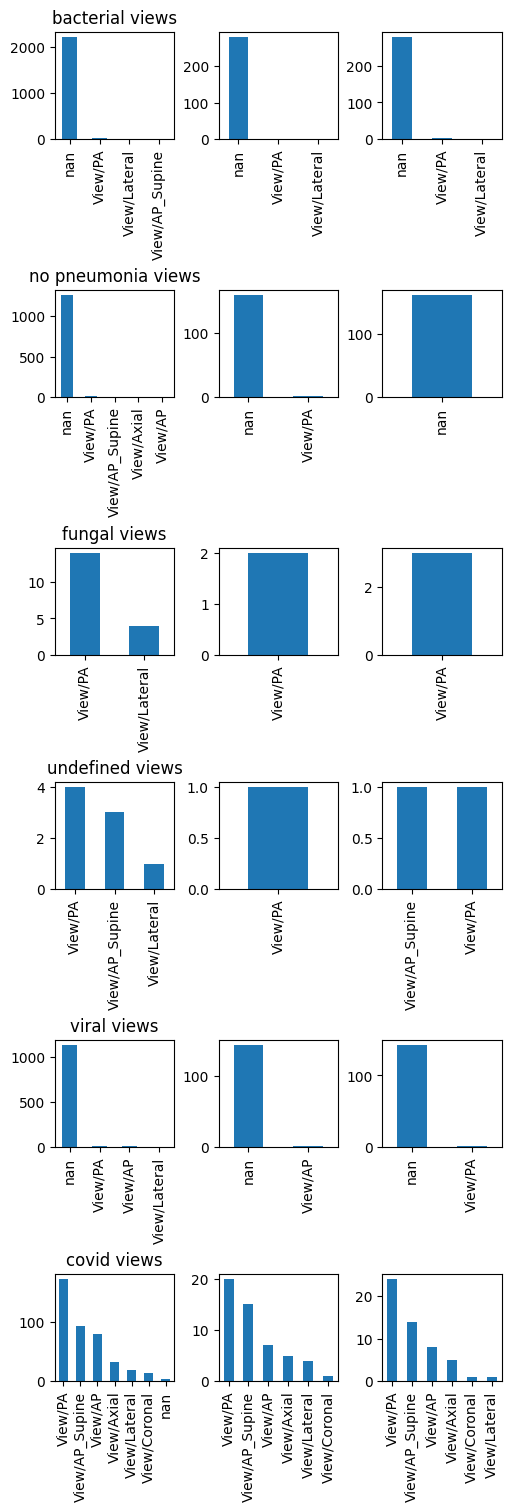

In [106]:
# distribution between views train test val
fig, axes = plt.subplots(nrows=6, ncols=3,constrained_layout=True, figsize=(5,15))
# fig.tight_layout()
# fig.tight_layout(h_pad=3)
# fig.tight_layout(v_pad=2)
# plt.title("distribution of view between types")

bac_train.view.value_counts(dropna=False).plot.bar(ax=axes[0,0], title='bacterial views')
bac_val.view.value_counts(dropna=False).plot.bar(ax=axes[0,1])
bac_test.view.value_counts(dropna=False).plot.bar(ax=axes[0,2])

no_train.view.value_counts(dropna=False).plot.bar(ax=axes[1,0], title='no pneumonia views')
no_val.view.value_counts(dropna=False).plot.bar(ax=axes[1,1])
no_test.view.value_counts(dropna=False).plot.bar(ax=axes[1,2])

fung_train.view.value_counts(dropna=False).plot.bar(ax=axes[2,0], title='fungal views')
fung_val.view.value_counts(dropna=False).plot.bar(ax=axes[2,1])
fung_test.view.value_counts(dropna=False).plot.bar(ax=axes[2,2])

un_train.view.value_counts(dropna=False).plot.bar(ax=axes[3,0],  title='undefined views')
un_val.view.value_counts(dropna=False).plot.bar(ax=axes[3,1])
un_test.view.value_counts(dropna=False).plot.bar(ax=axes[3,2])

viral_train.view.value_counts(dropna=False).plot.bar(ax=axes[4,0],  title='viral views')
viral_val.view.value_counts(dropna=False).plot.bar(ax=axes[4,1])
viral_test.view.value_counts(dropna=False).plot.bar(ax=axes[4,2])

cov_train.view.value_counts(dropna=False).plot.bar(ax=axes[5,0], title='covid views')
cov_val.view.value_counts(dropna=False).plot.bar(ax=axes[5,1])
cov_test.view.value_counts(dropna=False).plot.bar(ax=axes[5,2])

plt.show()

As you can see is the covid data the only data for which it is reliably labelled and a wide range accross all view types. For the others its often not defined, We therefore assume looking at the undefined, fungal, viral, bacterial and covid views that PA Supine, lateral and AP are all represented ,m but not always classified as such. **pa, Supine, Lateral and ap** are the most common over the categories.